<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
features type:<class 'numpy.ndarray'>
target type:<class 'numpy.ndarray'>
(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


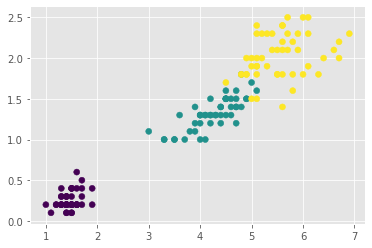

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

#features: petal length, petal width, sepal length, sepal width
#target species: versicolor, virginica, setsoa
plt.style.use('ggplot')

iris=load_iris()

#bunch lets you use a python dict like an object
print(type(iris))
print(iris.keys())

#feature and target are numpy arrays
print('features type:' + str(type(iris.data)))
print('target type:' + str(type(iris.target)))
print(iris.data.shape)

X=iris.data
y=iris.target

labels=y

df=pd.DataFrame(X,columns=iris.feature_names)
print(df.head(5))

xs=df['petal length (cm)']
ys=df['petal width (cm)']

_=plt.scatter(xs,ys,c=labels)
plt.show()

points=np.column_stack((xs,ys))
print(points)

In [43]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

print(model.inertia_)

new_points=np.random.permutation(points)

# Determine the cluster labels of new_points: labels
new_labels = model.predict(new_points)

# Print cluster labels of new_points
print(new_labels)


31.371358974358973
[0 1 2 2 0 2 1 1 0 0 0 2 2 0 0 2 1 2 1 2 0 1 0 1 1 0 2 2 0 1 1 2 2 1 0 2 2
 2 0 0 2 1 1 0 1 0 1 2 0 1 1 0 1 1 0 2 2 2 2 0 2 0 1 0 0 0 1 0 2 0 0 2 2 0
 2 1 0 0 1 1 0 1 1 1 1 1 2 0 2 0 1 2 2 2 2 2 0 1 0 2 2 0 1 0 0 1 0 1 2 1 1
 2 2 0 0 0 0 1 0 1 2 2 1 2 2 1 2 1 1 2 1 1 1 0 0 2 0 1 1 2 1 2 2 1 0 2 1 2
 2 2]


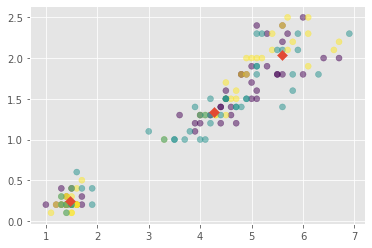

In [20]:
xs = new_points[:,0]
ys = new_points[:,1]

plt.clf()
# Make a scatter plot of xs and ys, using labels to define the colors
_=plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()


In [42]:
labels=iris.target
print(labels)
species=[]
for i in range(0,len(labels)):
    if(labels[i]==0):
        species.append("versicolor")
    elif(labels[i]==1):
        species.append("virginica")    
    elif(labels[i]==2):
        species.append('setsoa')
 
#print(species)

df2=pd.DataFrame({'labels':labels, 'species':species})
print(df2)
ct=pd.crosstab(df2['labels'],df2['species'])
print(ct)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     labels     species
0         0  versicolor
1         0  versicolor
2         0  versicolor
3         0  versicolor
4         0  versicolor
..      ...         ...
145       2      setsoa
146       2      setsoa
147       2      setsoa
148       2      setsoa
149       2      setsoa

[150 rows x 2 columns]
species  setsoa  versicolor  virginica
labels                                
0             0          50          0
1             0           0         50
2            50           0          0


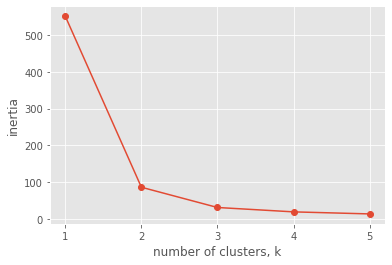

In [44]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
